In [3]:
# Step 1: Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [37]:
# Step 2: Prepare the data

movie_data = pd.read_excel('C:\\Users\\Dell\\Desktop\\user_preference.xlsx')
X_movie = movie_data[['Genre', 'Actor', 'Rating']]
y_movie = movie_data['Liked']  # Assuming 'Liked' is the target variable indicating whether the user liked the movie

In [62]:
# Grid Search for finding value of K

import warnings
warnings.filterwarnings("ignore")

# Define the parameter grid

param_grid = {'n_neighbors': range(1, 21)}

knn = KNeighborsClassifier()

# Use GridSearchCV to find the best 'k'

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_movie, y_movie)

# Print the best 'k' value
print("Best 'k':", grid_search.best_params_['n_neighbors'])


Best 'k': 7


In [63]:
# Step 3: Create the model

knn_model = KNeighborsClassifier(n_neighbors=7) 

In [64]:
# Step 4: Split the model into test and training data

X_movie_train, X_movie_test, y_movie_train, y_movie_test = train_test_split(X_movie, y_movie, test_size=0.2)

In [65]:
# Step 5: Train the model

knn_model.fit(X_movie_train, y_movie_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
# Step 6: Make predictions

knn_predictions = knn_model.predict(X_movie_test)
knn_predictions

array([1, 1, 1, 1], dtype=int64)

In [67]:
# Step 7: Evaluate the model

knn_f1 = f1_score(y_movie_test, knn_predictions)
print(f"KNN F1 score (HM of Precision and Recall) : {round(knn_f1, 2)}")

KNN F1 score (HM of Precision and Recall) : 0.86


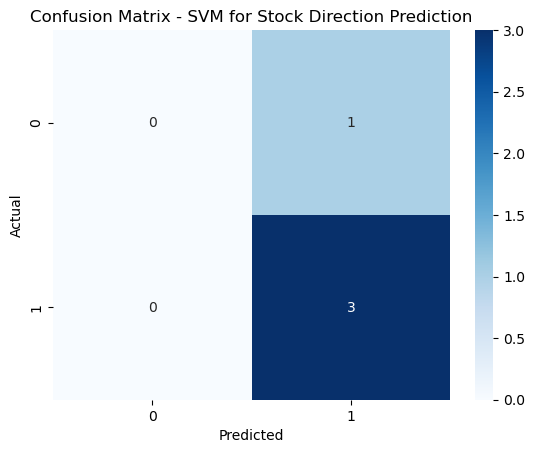

In [68]:
# Visualise the confusion matrix

sns.heatmap(confusion_matrix(y_movie_test, knn_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM for Stock Direction Prediction')
plt.show()

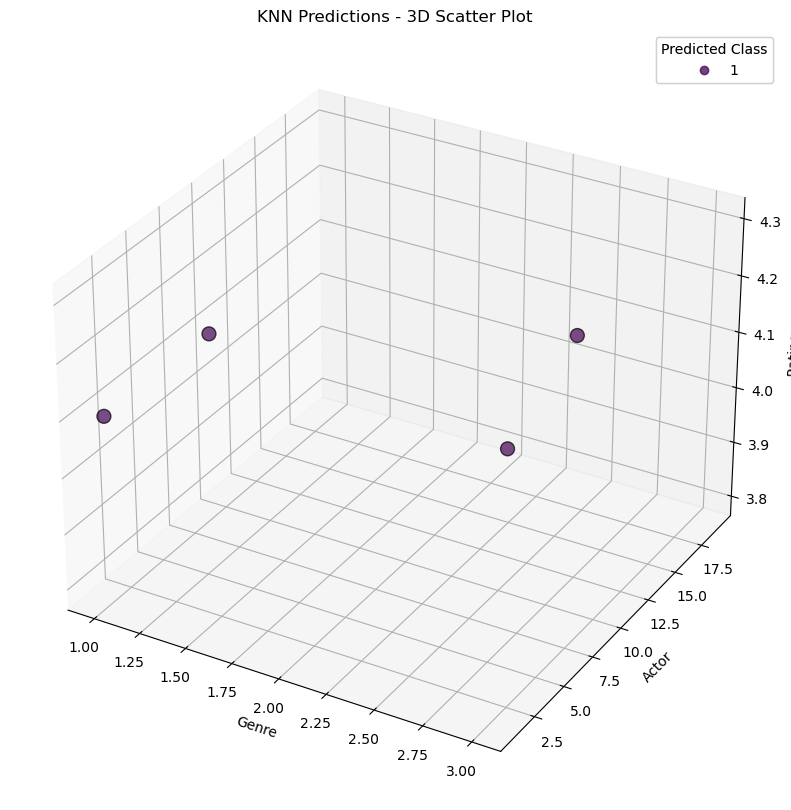

In [69]:
# Visualize the scatter plot and KNN algorithm

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_movie_test['Genre'], X_movie_test['Actor'], X_movie_test['Rating'], c=knn_predictions, cmap='viridis', marker='o', edgecolors='k', s=100, alpha=0.7)

ax.set_xlabel('Genre')
ax.set_ylabel('Actor')
ax.set_zlabel('Rating')
ax.set_title('KNN Predictions - 3D Scatter Plot')

legend1 = ax.legend(*scatter.legend_elements(), title='Predicted Class')
ax.add_artist(legend1)

plt.show()